In [383]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competitions/playground-series-s4e1/sample_submission.csv
/kaggle/input/competitions/playground-series-s4e1/train.csv
/kaggle/input/competitions/playground-series-s4e1/test.csv
/kaggle/input/notebooks/kmalit/bank-customer-churn-prediction/__results__.html
/kaggle/input/notebooks/kmalit/bank-customer-churn-prediction/__output__.json
/kaggle/input/notebooks/kmalit/bank-customer-churn-prediction/custom.css
/kaggle/input/notebooks/kmalit/bank-customer-churn-prediction/__results___files/__results___61_0.png
/kaggle/input/notebooks/kmalit/bank-customer-churn-prediction/__results___files/__results___66_0.png
/kaggle/input/notebooks/kmalit/bank-customer-churn-prediction/__results___files/__results___19_1.png
/kaggle/input/notebooks/kmalit/bank-customer-churn-prediction/__results___files/__results___27_0.png
/kaggle/input/notebooks/kmalit/bank-customer-churn-prediction/__results___files/__results___25_1.png
/kaggle/input/notebooks/kmalit/bank-customer-churn-prediction/__results___

In [468]:
sample = pd.read_csv('/kaggle/input/competitions/playground-series-s4e1/sample_submission.csv')
#this is how the result should be for test
train_data = pd.read_csv('/kaggle/input/competitions/playground-series-s4e1/train.csv') 
test_data = pd.read_csv('/kaggle/input/competitions/playground-series-s4e1/test.csv')

In [385]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [386]:
train_data.columns = train_data.columns.str.lower()

In [469]:
test_data.columns = test_data.columns.str.lower()

**Checking Data Quality**

In [388]:
len(train_data['id'].unique())

165034

We have no duplicate records

In [389]:
train_data.isna().sum()

id                 0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

No null values

**Feature Selection**

In [390]:
train_data.head()

,id,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [391]:
print(len(train_data['customerid'].unique()), len(train_data['surname'].unique()))

23221 2797


We have repeated values in customerid and surname, does not really affect the label

In [392]:
import matplotlib.pyplot as plt 
%matplotlib inline

Visualizing credit score 

(array([   56.,   871.,  3805., 10733., 27375., 32446., 39840., 31385.,
        11890.,  6633.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <BarContainer object of 10 artists>)

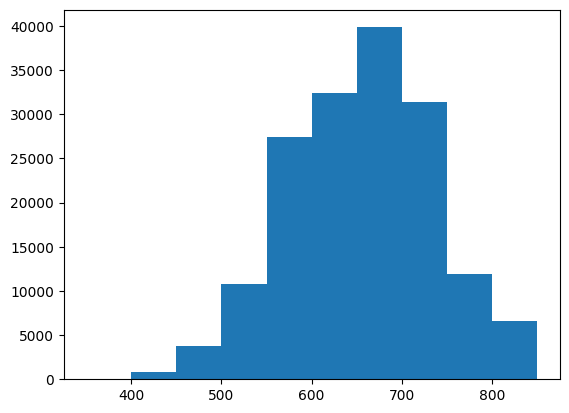

In [393]:
plt.hist(train_data['creditscore'])

(array([94215.,     0.,     0.,     0.,     0., 36213.,     0.,     0.,
            0., 34606.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

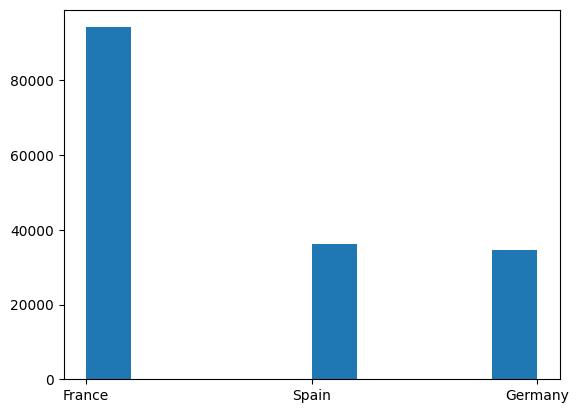

In [394]:
plt.hist(train_data['geography'])
#we can convert this to one hot encoder so that we get correlation

In [395]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
encoded=ohe.fit_transform(pd.DataFrame(train_data['geography']))

In [396]:
encoded = encoded.toarray()
encoded = encoded.astype(int)

In [397]:
features = ohe.get_feature_names_out(['geography'])

In [398]:
new = pd.DataFrame(encoded, columns=features)

In [399]:
train_data = pd.concat([train_data.drop(columns=['geography'],axis=1),new],axis=1)

In [400]:
train_data

,id,customerid,surname,creditscore,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_France,geography_Germany,geography_Spain
0,0,15674932,Okwudilichukwu,668,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0
1,1,15749177,Okwudiliolisa,627,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0
2,2,15694510,Hsueh,678,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0
3,3,15741417,Kao,581,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0
4,4,15766172,Chiemenam,716,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0,0,0,1
165030,165030,15665521,Okechukwu,792,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0,1,0,0
165031,165031,15664752,Hsia,565,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0,1,0,0
165032,165032,15689614,Hsiung,554,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0,0,1


(array([93150.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 71884.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

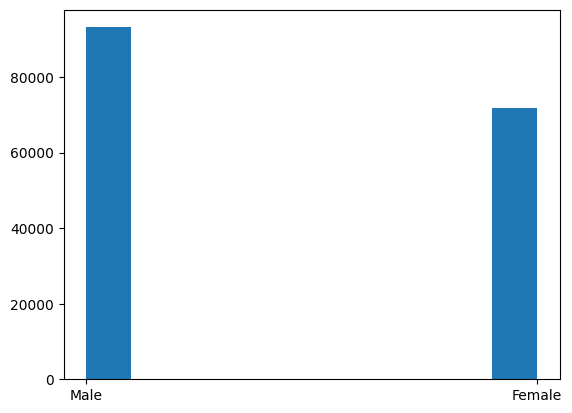

In [401]:
plt.hist(train_data['gender'])
#change it to numerical
#M=1, F=-1



In [402]:
train_data['gender'] = np.where(train_data['gender']=='Male',1,-1)

In [403]:
train_data['gender'].value_counts()

gender
 1    93150
-1    71884
Name: count, dtype: int64

(array([7.0930e+03, 3.6582e+04, 6.9108e+04, 3.0665e+04, 1.2109e+04,
        6.6800e+03, 1.9750e+03, 7.3600e+02, 7.2000e+01, 1.4000e+01]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

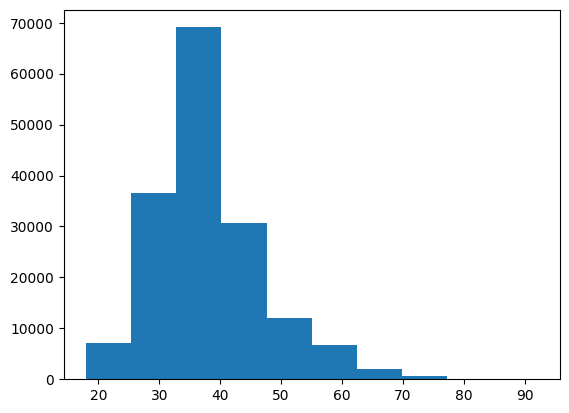

In [404]:
plt.hist(train_data['age'])

In [405]:
train_data['hascrcard'] = train_data['hascrcard'].astype(int)
train_data['isactivemember'] = train_data['isactivemember'].astype(int)
train_data['age'] = train_data['age'].astype(int)

(array([ 40606.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 124428.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

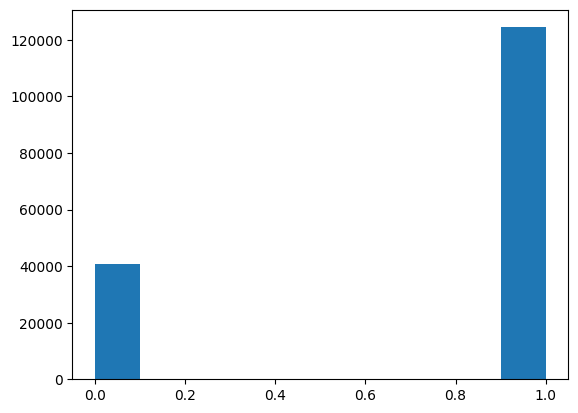

In [406]:
plt.hist(train_data['hascrcard'])

In [407]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 165034 non-null  int64  
 1   customerid         165034 non-null  int64  
 2   surname            165034 non-null  object 
 3   creditscore        165034 non-null  int64  
 4   gender             165034 non-null  int64  
 5   age                165034 non-null  int64  
 6   tenure             165034 non-null  int64  
 7   balance            165034 non-null  float64
 8   numofproducts      165034 non-null  int64  
 9   hascrcard          165034 non-null  int64  
 10  isactivemember     165034 non-null  int64  
 11  estimatedsalary    165034 non-null  float64
 12  exited             165034 non-null  int64  
 13  geography_France   165034 non-null  int64  
 14  geography_Germany  165034 non-null  int64  
 15  geography_Spain    165034 non-null  int64  
dtypes:

In [408]:
train_data.head()

,id,customerid,surname,creditscore,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_France,geography_Germany,geography_Spain
0,0,15674932,Okwudilichukwu,668,1,33,3,0.00,2,1,0,181449.97,0,1,0,0
1,1,15749177,Okwudiliolisa,627,1,33,1,0.00,2,1,1,49503.50,0,1,0,0
2,2,15694510,Hsueh,678,1,40,10,0.00,2,1,0,184866.69,0,1,0,0
3,3,15741417,Kao,581,1,34,2,148882.54,1,1,1,84560.88,0,1,0,0
4,4,15766172,Chiemenam,716,1,33,5,0.00,2,1,1,15068.83,0,0,0,1


In [421]:
train_data.drop(columns=['surname','id','customerid'],inplace=True)
#train_data.drop(columns=['surname'],inplace=True)

In [410]:
correlation = train_data.corr()


Visualize the correlation with heatmap

In [411]:
import seaborn as sns

<Axes: >

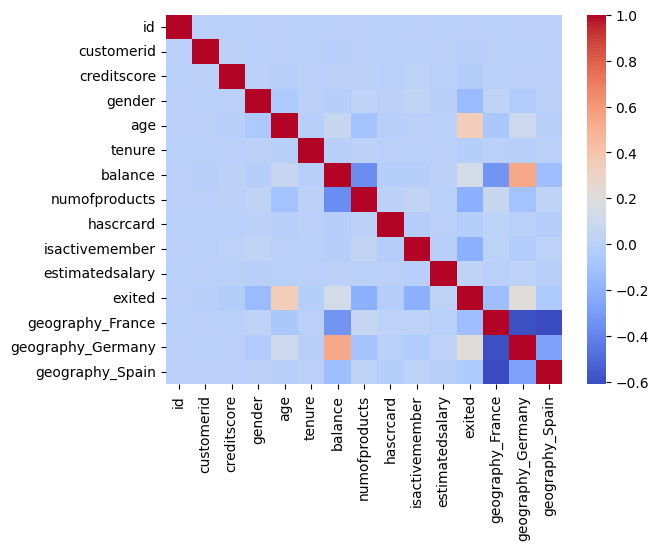

In [412]:
sns.heatmap(correlation, cmap ='coolwarm')

In [413]:
#correlation['exited'] #salary , creditscore, tenure,has credit card, all hardly matter

In [422]:
train_data.drop(columns=['creditscore','tenure','hascrcard','estimatedsalary'],axis=1,inplace=True)

As we can see, we do not have much correlation : can be treated as independent variables.

**Balances is connected to AGE**

# Predict Output

In [423]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [424]:
X= train_data.drop('exited',axis=1)

In [425]:
y = train_data['exited']

In [426]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [431]:
clf = RandomForestClassifier(n_estimators = 1000, criterion='gini',bootstrap=True)

In [432]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [433]:
y_pred = clf.predict(X_test)

In [435]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.835034992577332

**Need to make the accuracy better, apply boosting**

In [438]:
import xgboost as xgb

In [439]:
model = xgb.XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [440]:
y_pred = model.predict(X_test)

In [441]:
accuracy_score(y_pred,y_test)

0.8609082921804466

slightly better 

# **Prediction**

In [470]:
encoded = ohe.fit_transform(pd.DataFrame(test_data['geography']))
encoded = encoded.toarray().astype(int)

In [471]:
features = ohe.get_feature_names_out(['geography'])

In [472]:
new_test = pd.DataFrame(encoded,columns=features)

In [473]:
test_data = pd.concat([test_data.drop('geography',axis=1),new_test],axis=1)

In [474]:
test_data['gender'] = np.where(test_data['gender']=='Male',1,-1)

In [475]:
test_data['hascrcard'] = test_data['hascrcard'].astype(int)
test_data['isactivemember'] = test_data['isactivemember'].astype(int)

id = test_data['id']

In [476]:
id

0         165034
1         165035
2         165036
3         165037
4         165038
           ...  
110018    275052
110019    275053
110020    275054
110021    275055
110022    275056
Name: id, Length: 110023, dtype: int64

In [477]:
test_data.drop(columns=['surname','id','customerid','creditscore','tenure','hascrcard','estimatedsalary'],axis=1,inplace=True)

In [478]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   gender             110023 non-null  int64  
 1   age                110023 non-null  float64
 2   balance            110023 non-null  float64
 3   numofproducts      110023 non-null  int64  
 4   isactivemember     110023 non-null  int64  
 5   geography_France   110023 non-null  int64  
 6   geography_Germany  110023 non-null  int64  
 7   geography_Spain    110023 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 6.7 MB


In [479]:
y_pred = model.predict(test_data)

In [487]:
ans = pd.concat([pd.DataFrame(id),pd.DataFrame(y_pred,columns=['Exited'])],axis=1)

In [488]:
ans['Exited'].value_counts()

Exited
0    92441
1    17582
Name: count, dtype: int64

In [491]:
ans.rename(columns={'id':'Id'},inplace=True)

In [492]:
ans.to_csv('output.csv')